In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 1--Dataset Downloaded

# 2--Load the dataset

In [2]:
data=pd.read_csv(r"D:\Chrome_Downloads\Mall_Customers.csv")

# 3--Visuslization

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Count'>

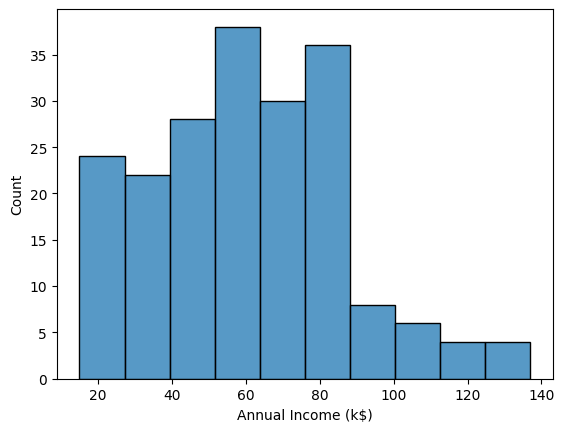

In [4]:
sns.histplot(data['Annual Income (k$)'])

<AxesSubplot: >

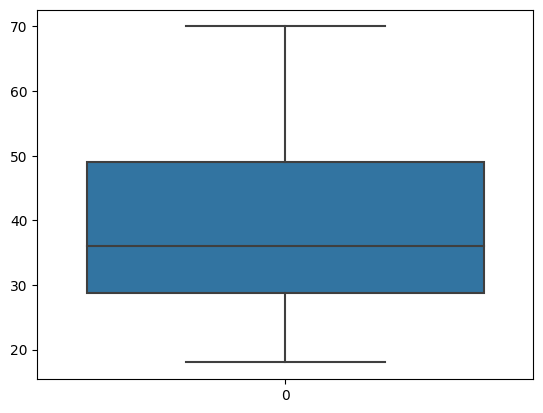

In [5]:
sns.boxplot(data['Age'])

<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Density'>

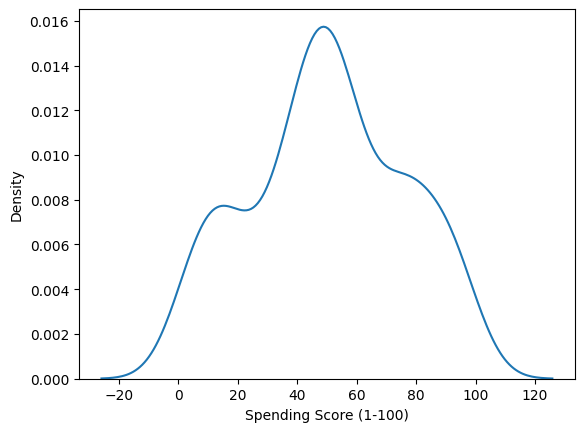

In [6]:
sns.kdeplot(data['Spending Score (1-100)'])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Count'>

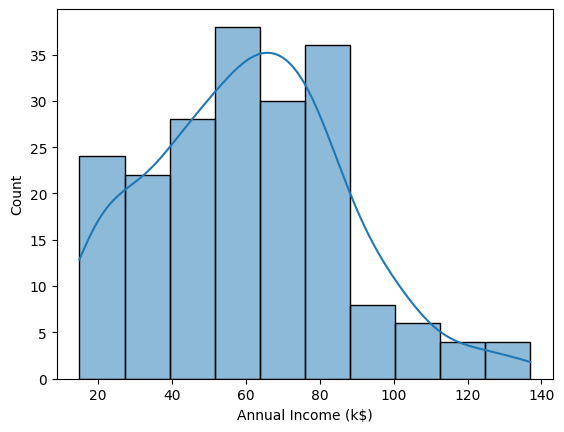

In [7]:
sns.histplot(data['Annual Income (k$)'],kde=True)

<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Density'>

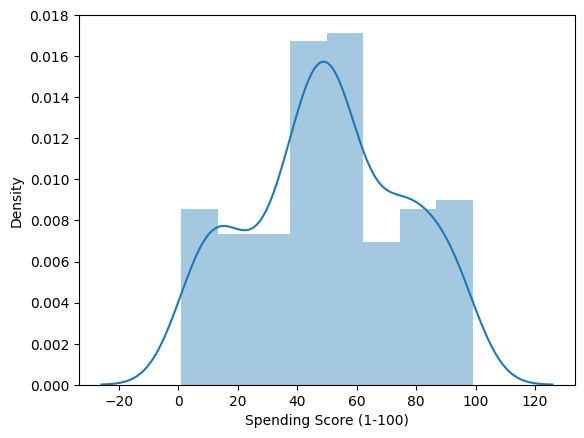

In [8]:
sns.distplot(data['Spending Score (1-100)'],kde=True)

# Bivariate Analysis

<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

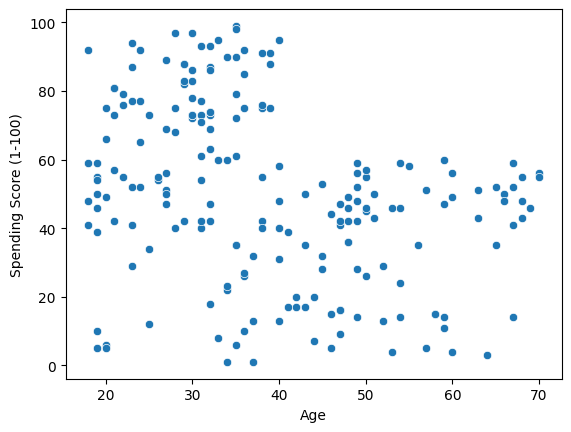

In [9]:
sns.scatterplot(data=data,x='Age', y='Spending Score (1-100)')

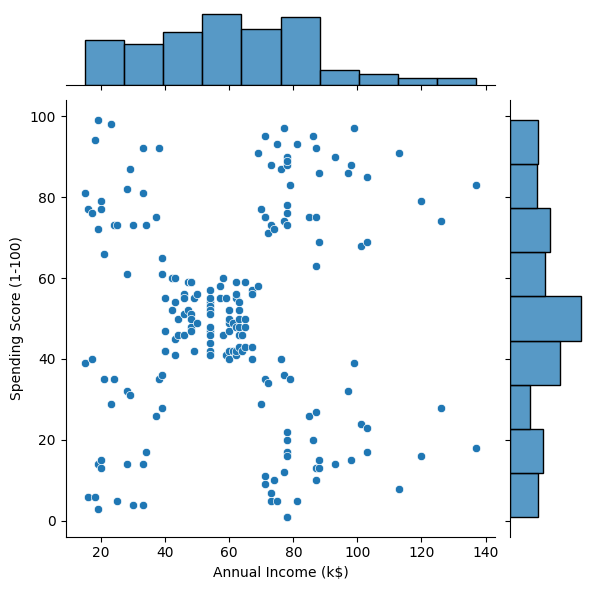

In [10]:
sns.jointplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)')

<AxesSubplot: xlabel='Gender', ylabel='Annual Income (k$)'>

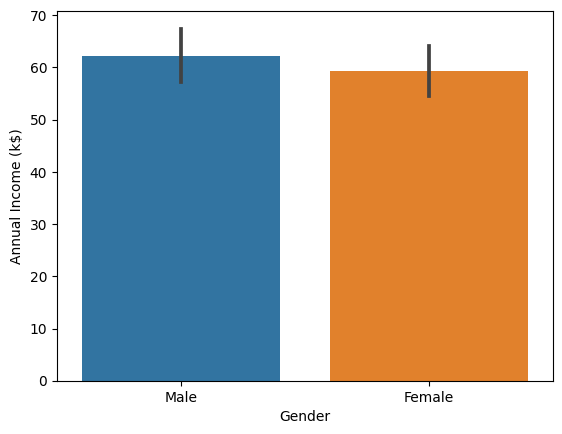

In [11]:
sns.barplot(data=data,x='Gender',y='Annual Income (k$)')

# Multivariate Analysis

In [12]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot: >

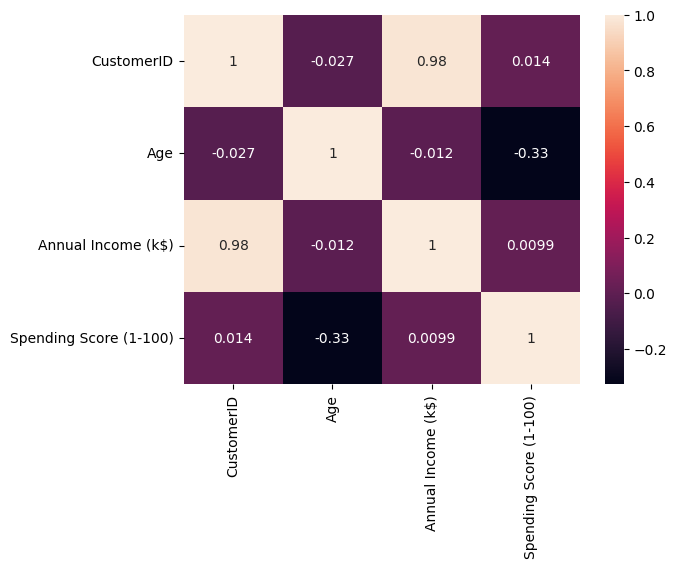

In [13]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot: ylabel='count'>

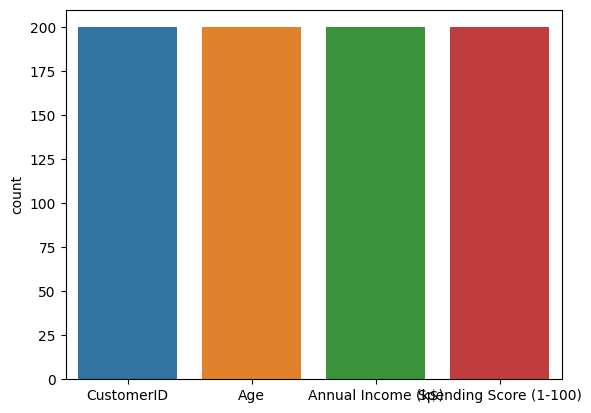

In [14]:
sns.countplot(data)

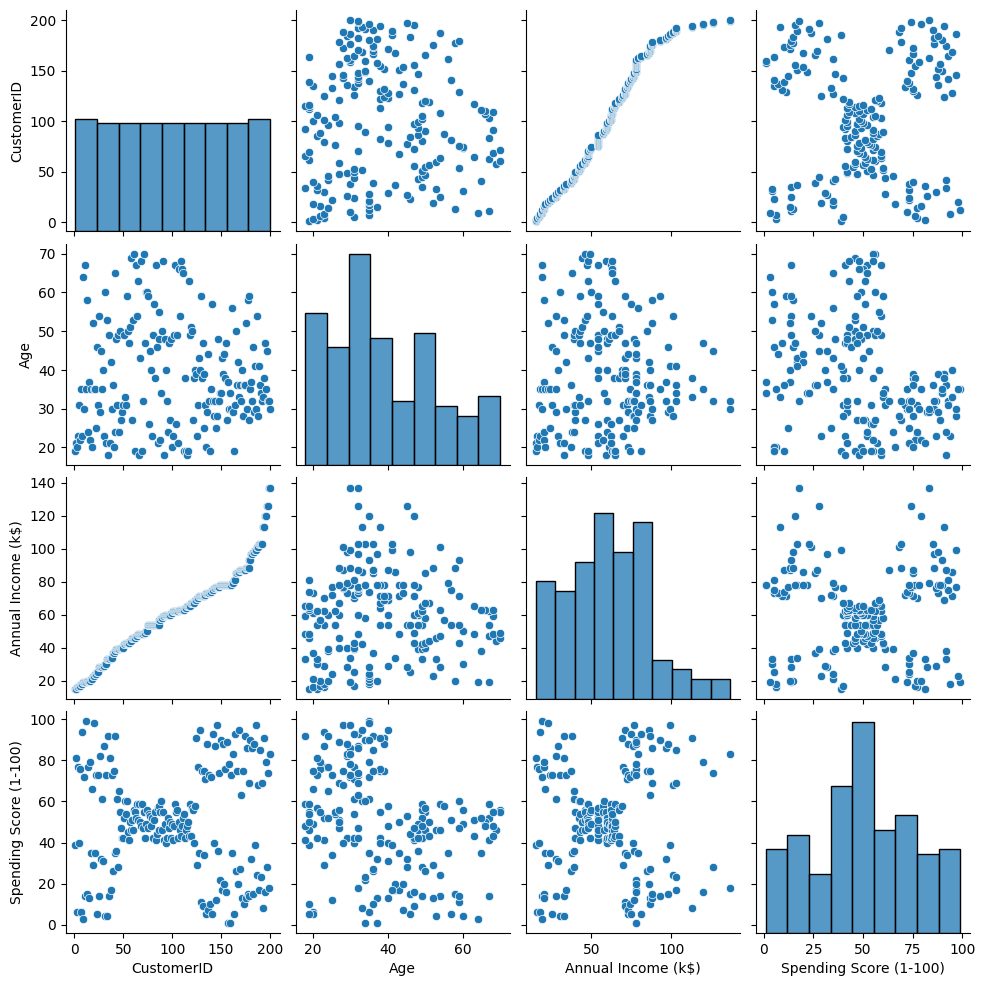

In [15]:
sns.pairplot(data)

# 4--Descriptive Statistics

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5--Handling missing values

In [18]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# There is no missing values in this dataset

# 6--Handling Outliers

In [19]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# IQR

In [20]:
quant=data.quantile(q=[0.75,0.25])
quant

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [21]:
iqr=quant.loc[0.75]-quant.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

# UPPER BOUND

In [22]:
upper=quant.loc[0.75]+(1.5*iqr)
print(upper)

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64


# LOWER BOUND

In [23]:
lower=quant.loc[0.25]-(1.5*iqr)
lower

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

# MEAN

In [24]:
data.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

<AxesSubplot: >

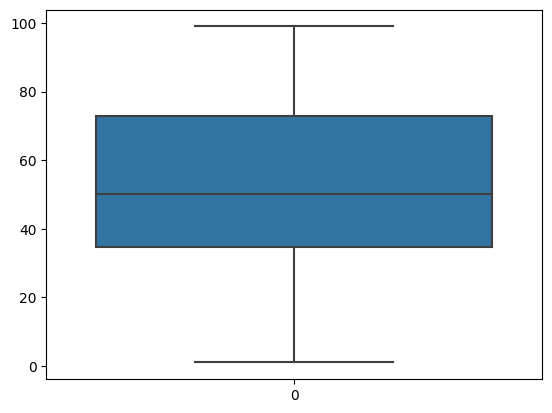

In [25]:
sns.boxplot(data['Spending Score (1-100)'])

<AxesSubplot: >

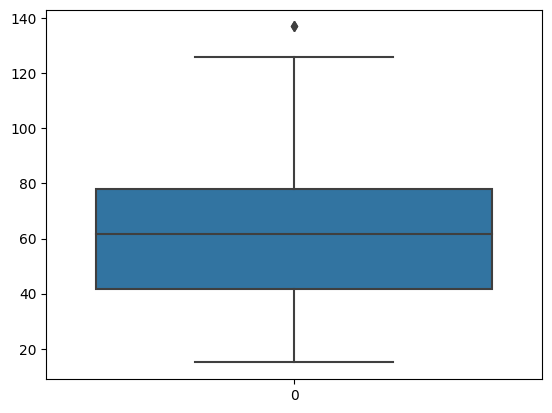

In [26]:
sns.boxplot(data['Annual Income (k$)'])

# REMOVING OUTLIER FOR Annual Income (k$)

<AxesSubplot: >

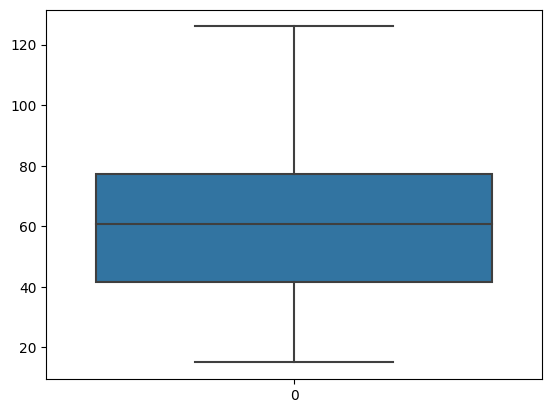

In [28]:
data['Annual Income (k$)']=np.where(data['Annual Income (k$)']> 132.750,60.56,data['Annual Income (k$)'])
sns.boxplot(data['Annual Income (k$)'])

# Outlier removed for Annual Income (k$)

<AxesSubplot: >

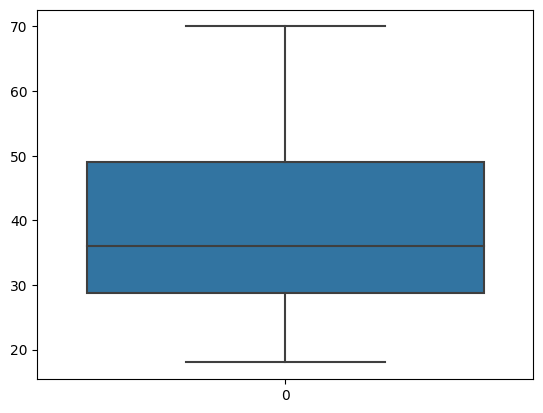

In [29]:
sns.boxplot(data['Age'])

<AxesSubplot: >

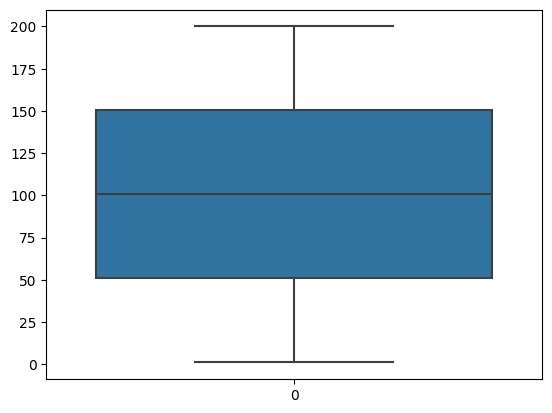

In [30]:
 sns.boxplot(data['CustomerID'])

# 7--Encoding

In [3]:
data=pd.get_dummies(data,columns=['Gender'])

In [4]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


# 8--Scaling independant variables

In [26]:
from sklearn.preprocessing import scale
x=scale(data)
x

array([[-1.7234121 , -1.42456879, -1.73899919, ..., -1.12815215,
         1.12815215, -0.53333333],
       [-1.70609137, -1.28103541, -1.73899919, ..., -1.12815215,
         1.12815215, -0.53333333],
       [-1.68877065, -1.3528021 , -1.70082976, ...,  0.88640526,
        -0.88640526,  0.8       ],
       ...,
       [ 1.68877065, -0.49160182,  2.49780745, ..., -1.12815215,
         1.12815215,  0.13333333],
       [ 1.70609137, -0.49160182,  2.91767117, ..., -1.12815215,
         1.12815215,  1.46666667],
       [ 1.7234121 , -0.6351352 ,  2.91767117, ..., -1.12815215,
         1.12815215,  0.13333333]])

# 9-- Perform clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [8]:
TWSS

[387114.74027402734,
 271445.64996197046,
 195449.91727575628,
 157219.5105178482,
 122686.20942128116,
 104006.39399472413,
 86102.37999222998]

Text(0, 0.5, 'TWSS')

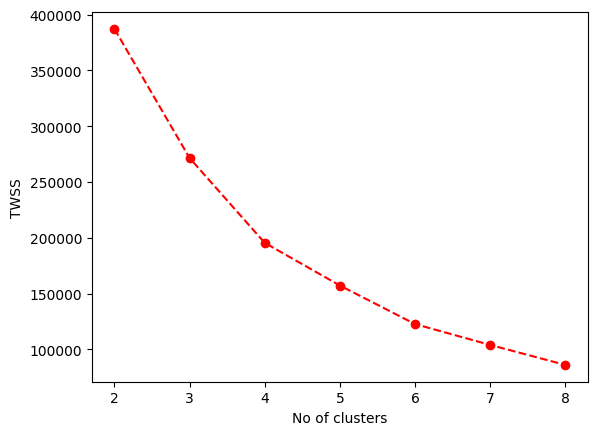

In [9]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('No of clusters')
plt.ylabel("TWSS")

In [10]:
model=KMeans(n_clusters=5)
model.fit(data)


KMeans(n_clusters=5)

In [11]:
model.labels_

array([1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [12]:
mb=pd.Series(model.labels_)

# 10--Adding cluster data into primary dataset

In [13]:
data['cluster']=mb

In [14]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,1,19,15,39,0,1,1
1,2,21,15,81,0,1,1
2,3,20,16,6,1,0,3
3,4,23,16,77,1,0,1
4,5,31,17,40,1,0,3


# 11--Splitting data into dependant and independant variables

In [15]:
x=data.drop(columns=['Annual Income (k$)'])
y=data['Annual Income (k$)']

In [16]:
x

,CustomerID,Age,Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,1,19,39,0,1,1
1,2,21,81,0,1,1
2,3,20,6,1,0,3
3,4,23,77,1,0,1
4,5,31,40,1,0,3
...,...,...,...,...,...,...
195,196,35,79,1,0,2
196,197,45,28,1,0,4
197,198,32,74,0,1,2
198,199,32,18,0,1,4


In [17]:
y

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

# 12--splitting the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 13-Building the model

In [19]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)


LogisticRegression()

# 14--Training the model

In [20]:
#prediction on training data

pred=reg.predict(x_train)
pred

array([137,  48,  28,  87,  78,  48,  19,  54,  62,  78,  54, 103,  78,
        62,  78,  28,  18,  71,  28,  43,  71,  62,  78,  20,  78,  54,
        43,  78,  40,  48,  78,  54,  78,  62, 103,  54,  63,  28,  28,
        54, 137,  33, 137,  78,  63,  44,  19,  43,  88, 137,  37,  19,
        88,  48,  78,  88,  78,  67,  62,  67,  87,  87,  43,  19,  62,
        63,  62,  48,  78,  37,  54,  40,  40,  54,  23,  78,  28,  88,
        78,  28,  23,  54,  54,  40,  78,  48,  15,  63,  88, 103,  19,
        48,  54,  67,  78,  87,  87,  87, 137,  19,  62,  54,  37,  44,
        48,  15,  78, 137,  44,  87,  78,  78,  23,  40,  78,  33,  78,
        71,  44,  28, 137,  71,  29,  78,  54,  88,  63,  78,  78,  78,
        21,  78,  63,  54, 137,  78,  78,  48,  54,  24,  78,  54,  87,
        88, 103,  37,  40,  93,  54,  48,  62,  49,  24,  19,  62,  50,
       103,  62,  40,  87], dtype=int64)

In [21]:
#prediction on testing data
y_pred=reg.predict(x_test)
y_pred


array([ 20,  87,  62,  62, 137,  88,  15,  71,  19,  88,  48,  62,  87,
        88,  54,  15,  21,  93,  38,  48,  81,  78,  40,  78,  33,  54,
        78,  78,  62,  44,  28,  40,  88,  87,  28,  78,  71,  19,  54,
        63], dtype=int64)

# 15--Testing the model

In [22]:
reg.predict([[1,19,15.00,0,1,2]])

array([19], dtype=int64)

# 16--Performance using metrices

In [23]:
from sklearn.metrics import r2_score

print(f'Testing accuracy:{(r2_score(y_test,y_pred))*100:.2f}%')

Testing accuracy:76.17%


In [24]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
metrics.r2_score(y_test,y_pred)

0.7616833554031335

In [25]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         2
          48       0.00    